# Note
This notebook is created on a confidential data, so the data is not included in this repository.


# EDA on users list of the service


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
users = pd.read_csv('../data/users.csv')
users.head()


,_id,__v,about,aboutPartner,adminNotifications,age,amountPaid,anyOtherRequirements,appUninstalled,blocked,...,requiredQualification,requiredReligion,requiredReligions,rishtaDone,role,sentProposals,sentProposalsProfiles,updatedAt,weight,whatsappNumber
0,6129406866b10f0016e72365,1,Abid Ali from Faisalabad.\nLooking for a bride...,NaN,[ ],32.0,0,5 times Namaz per day\n29 to 30 Fastings per y...,False,False,...,graduate,islam,[ ],False,admin,[ ],[ ],24/10/2022 02:13:47.25,67.0,03226267712
1,61547178d75145c8b8e34149,1,Abid Ali from Faisalabad.\nLooking for a bride...,دن میں 5 نمازیں لازمی\nسالانہ فرض روزے لازمی\n...,"[ ""testing notification"", ""test notifications""...",32.0,0,دن میں 5 نمازیں لازمی\nسالانہ فرض روزے لازمی\n...,False,True,...,intermediate,islam,"[ ""Only Muslim"", ""Muslim-Deobandi"", ""Muslim-Ah...",False,profile,[ ],[ ],10/7/2022 07:51:51.998,67.0,03226267712
2,615559f17ae1ba46a4bbb641,0,Outing,NaN,"[ ""Profile picture has been reported as fake."" ]",18.0,0,No any other requirements,True,True,...,graduate,islam,NaN,False,profile,[ ],[ ],20/2/2022 04:33:45.757,50.0,03217794076
3,61557db76ca85312c8dbec6b,0,NaN,NaN,[ ],NaN,0,NaN,False,False,...,any,islam,NaN,False,profile,[ ],[ ],30/9/2021 09:05:34.16,NaN,NaN
4,615591fb53c080eec854c8a0,0,Bnk job,NaN,[ ],28.0,0,Nall,False,False,...,middle,islam,NaN,True,profile,[ ],[ ],30/9/2021 11:11:24.357,52.0,03084500380


In [85]:
users.columns


Index(['_id', '__v', 'about', 'aboutPartner', 'adminNotifications', 'age',
       'amountPaid', 'anyOtherRequirements', 'appUninstalled', 'blocked',
       'caste', 'cityOfResidence', 'contactNumber', 'createdAt',
       'currentBalance', 'disability', 'fatherOccupation', 'favorites',
       'gender', 'height', 'homeOwnOrRent', 'homeSize', 'imageUrl',
       'interests', 'isPrivate', 'jobInstitute', 'jobTitle', 'maritalStatus',
       'maslak', 'monthlyIncome', 'motherOccupation', 'myHiddenProfiles',
       'name', 'numOfBrothers', 'numOfMarriedSiblings', 'numOfSisters',
       'onHold', 'password', 'phone', 'phrase', 'profileCompleted',
       'profileReports', 'publishingState', 'pushToken', 'qualification',
       'qualificationDetails', 'receivedProposals',
       'receivedProposalsProfiles', 'refreshToken', 'religion',
       'requiredCaste', 'requiredCities', 'requiredCityOfResidence',
       'requiredMaritalStatus', 'requiredMaritalStatuses', 'requiredMaslak',
       'requiredMa

In [86]:
# remove unwanted columns from the data
users.drop(['adminNotifications', '__v', 'favorites', 'imageUrl', 'myHiddenProfiles', 'password', 'profileReports', 'receivedProposals', 'receivedProposalsProfiles', 'refreshToken', 'sentProposals', 'sentProposalsProfiles'], inplace=True, axis=1)

In [87]:
users.head()


,_id,about,aboutPartner,age,amountPaid,anyOtherRequirements,appUninstalled,blocked,caste,cityOfResidence,...,requiredMaxAge,requiredMinHeight,requiredQualification,requiredReligion,requiredReligions,rishtaDone,role,updatedAt,weight,whatsappNumber
0,6129406866b10f0016e72365,Abid Ali from Faisalabad.\nLooking for a bride...,NaN,32.0,0,5 times Namaz per day\n29 to 30 Fastings per y...,False,False,Rehmani,Faisalabad,...,27.0,60.0,graduate,islam,[ ],False,admin,24/10/2022 02:13:47.25,67.0,03226267712
1,61547178d75145c8b8e34149,Abid Ali from Faisalabad.\nLooking for a bride...,دن میں 5 نمازیں لازمی\nسالانہ فرض روزے لازمی\n...,32.0,0,دن میں 5 نمازیں لازمی\nسالانہ فرض روزے لازمی\n...,False,True,Rehmani,Faisalabad,...,27.0,60.0,intermediate,islam,"[ ""Only Muslim"", ""Muslim-Deobandi"", ""Muslim-Ah...",False,profile,10/7/2022 07:51:51.998,67.0,03226267712
2,615559f17ae1ba46a4bbb641,Outing,NaN,18.0,0,No any other requirements,True,True,Jutt,Lahore,...,35.0,60.0,graduate,islam,NaN,False,profile,20/2/2022 04:33:45.757,50.0,03217794076
3,61557db76ca85312c8dbec6b,NaN,NaN,NaN,0,NaN,False,False,NaN,NaN,...,80.0,60.0,any,islam,NaN,False,profile,30/9/2021 09:05:34.16,NaN,NaN
4,615591fb53c080eec854c8a0,Bnk job,NaN,28.0,0,Nall,False,False,Rajpot,Shaiwal,...,30.0,60.0,middle,islam,NaN,True,profile,30/9/2021 11:11:24.357,52.0,03084500380


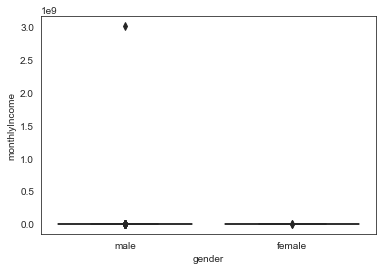

In [88]:
# boxplot
sns.boxplot(x="gender", y="monthlyIncome",
             palette=["m", "g"],
            data=users)
# sns.despine(offset=10, trim=True)
plt.show()

In [89]:
df_copy = users.copy()


In [90]:
monthly_income = users.loc[:, 'monthlyIncome'].copy()
monthly_income.fillna(value=0, inplace=True)
monthly_income

0      50000.0
1      40000.0
2      40000.0
3          0.0
4      25000.0
        ...   
372    25000.0
373        0.0
374    80000.0
375    20000.0
376        0.0
Name: monthlyIncome, Length: 377, dtype: float64

In [91]:
monthly_income[98:110]


98     0.000000e+00
99     5.000000e+03
100    0.000000e+00
101    0.000000e+00
102    3.006833e+09
103    0.000000e+00
104    0.000000e+00
105    1.500000e+05
106    0.000000e+00
107    0.000000e+00
108    0.000000e+00
109    1.000000e+05
Name: monthlyIncome, dtype: float64

In [92]:
monthly_income[105]


150000.0

In [93]:
monthly_income[monthly_income>100000]


18     2.000000e+05
26     1.250000e+05
40     1.150000e+05
71     2.000000e+05
102    3.006833e+09
105    1.500000e+05
121    2.000000e+05
196    2.000000e+05
205    3.000000e+05
247    5.000000e+05
260    6.000000e+05
265    5.000000e+05
267    2.000000e+05
270    1.500000e+05
294    1.000000e+06
347    2.000000e+05
Name: monthlyIncome, dtype: float64

In [94]:
users['monthlyIncome'] = monthly_income

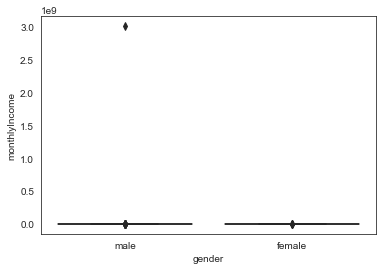

In [95]:
sns.boxplot(x="gender", y="monthlyIncome",
            palette=["m", "g"],
            data=users)
# sns.despine(offset=10, trim=True)
plt.show()


In [96]:
# removing the outliers (a better way to scale it down if the data does not contain the outliers as in this case, but scaling will be checked later on
# todo: add scaling method and create another graph
users_copy = users.copy()
monthly_income_copy = monthly_income.copy()

In [97]:
monthly_income_copy[monthly_income_copy > 100000] = 0
users_copy["monthlyIncome"] = monthly_income_copy

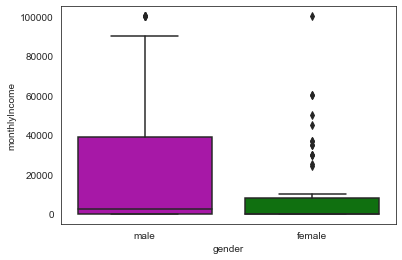

In [98]:
sns.boxplot(x="gender", y="monthlyIncome",
            palette=["m", "g"],
            data=users_copy)
# sns.despine(offset=10, trim=True)
plt.show()

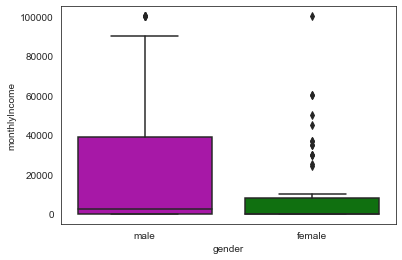

In [99]:
sns.boxplot(x="gender", y="monthlyIncome",
            palette=["m", "g"],
            data=users_copy)
# sns.despine(offset=10, trim=True)
plt.show()

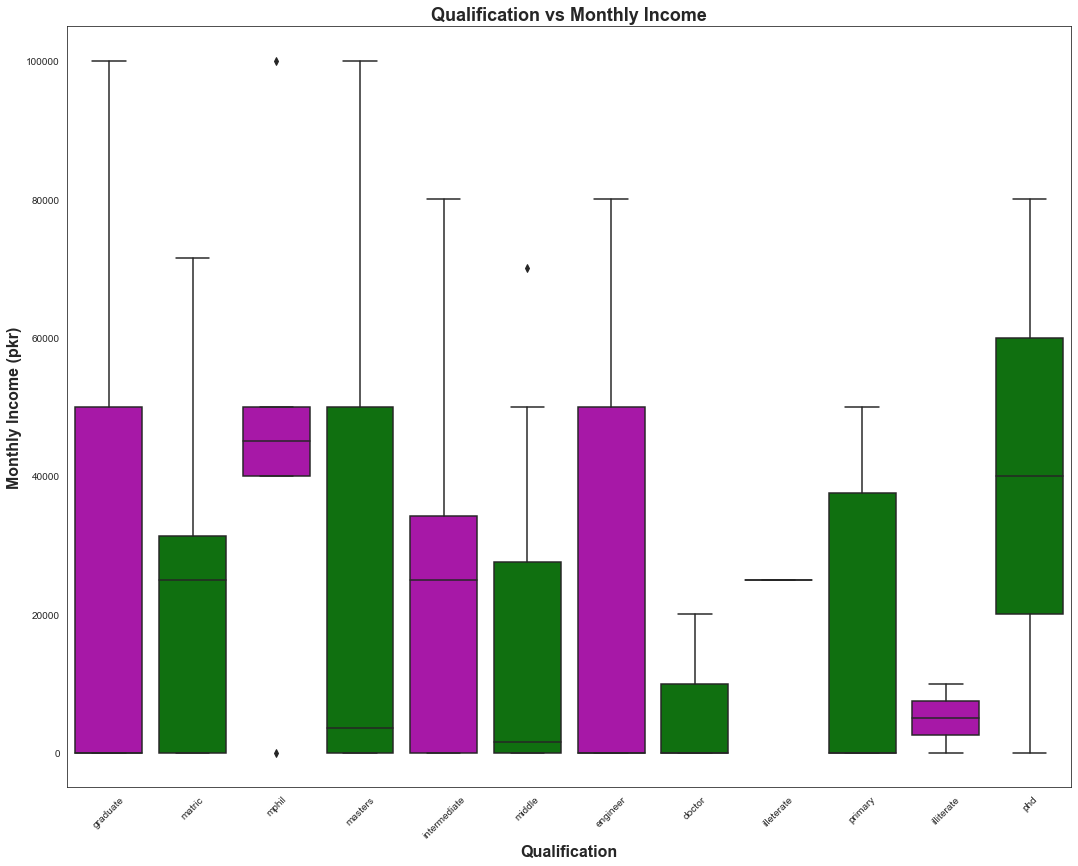

In [107]:
sns.set_style('white')
plt.figure(figsize=(18,14))
plt.title(label="Qualification vs Monthly Income", size=18, weight="bold")
plt.xticks(rotation=45)
sns.boxplot(x="qualification", y="monthlyIncome",
            palette=["m", "g"],
            data=users_copy)
# sns.despine(offset=10, trim=True)
plt.ylabel(ylabel="Monthly Income (pkr)", size=16, weight="bold")
plt.xlabel(xlabel="Qualification", size=16, weight="bold")
plt.show()


In [108]:
users_copy.columns


Index(['_id', 'about', 'aboutPartner', 'age', 'amountPaid',
       'anyOtherRequirements', 'appUninstalled', 'blocked', 'caste',
       'cityOfResidence', 'contactNumber', 'createdAt', 'currentBalance',
       'disability', 'fatherOccupation', 'gender', 'height', 'homeOwnOrRent',
       'homeSize', 'interests', 'isPrivate', 'jobInstitute', 'jobTitle',
       'maritalStatus', 'maslak', 'monthlyIncome', 'motherOccupation', 'name',
       'numOfBrothers', 'numOfMarriedSiblings', 'numOfSisters', 'onHold',
       'phone', 'phrase', 'profileCompleted', 'publishingState', 'pushToken',
       'qualification', 'qualificationDetails', 'religion', 'requiredCaste',
       'requiredCities', 'requiredCityOfResidence', 'requiredMaritalStatus',
       'requiredMaritalStatuses', 'requiredMaslak', 'requiredMaxAge',
       'requiredMinHeight', 'requiredQualification', 'requiredReligion',
       'requiredReligions', 'rishtaDone', 'role', 'updatedAt', 'weight',
       'whatsappNumber'],
      dtype='object

In [116]:
qual = users_copy['qualification'].copy()
qual.fillna(value="unknown", inplace=True)
users_copy['qualification'] = qual

In [115]:
users_copy['qualification']


0      graduate
1      graduate
2        matric
3       unknown
4        matric
         ...   
372      middle
373     primary
374         phd
375      doctor
376         phd
Name: qualification, Length: 377, dtype: object

In [119]:
users_copy['qualification'].unique()

array(['graduate', 'matric', 'unknown', 'mphil', 'masters',
       'intermediate', 'middle', 'engineer', 'doctor', 'illeterate',
       'primary', 'illiterate', 'phd'], dtype=object)

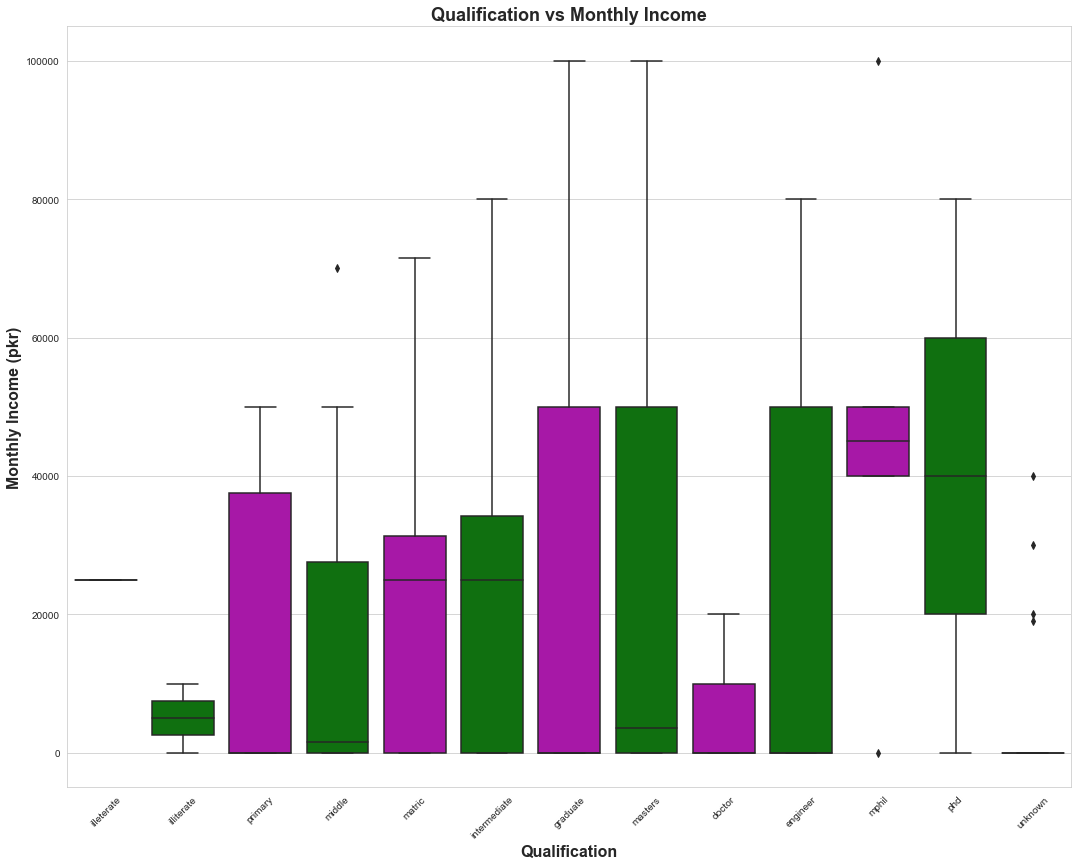

In [121]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,14))
plt.title(label="Qualification vs Monthly Income", size=18, weight="bold")
plt.xticks(rotation=45)
sns.boxplot(x="qualification", y="monthlyIncome",
            palette=["m", "g"],
            order=["illeterate",'illiterate','primary','middle','matric', 'intermediate', 'graduate', 'masters', 'doctor', 'engineer', 'mphil', 'phd', 'unknown'],
            data=users_copy)
# sns.despine(offset=10, trim=True)
plt.ylabel(ylabel="Monthly Income (pkr)", size=16, weight="bold")
plt.xlabel(xlabel="Qualification", size=16, weight="bold")
plt.show()